## notebook with simple examples of the statistics of data assimilation
### Follows Warner, Numerical Weather and Climate Prediction, section 6.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### the first method we will use is variance minimization

#### set some initial parameters

In [27]:
T_o = 60.  ## observation (of, say, temperature)
T_b = 55.  ## background (aka "first guess" aka "prior") value

var_b = 2.0  ## variance of background error
var_o = 1.0  ## variance of observation error

#### calculate k using Warner's equation 6.14 and analysis using equation 6.16:

$$
k = \frac{\sigma_b^2}{\sigma_b^2 + \sigma_o^2}
$$
$$
T_a = T_b + k(T_o - T_b)
$$

In [28]:
k = var_b/(var_b+var_o)
T_anl = T_b+k*(T_o-T_b)  ### the analyzed temperature

var_anl = var_b*(1-k)  ## equation 6.17

#### print out relevant values

In [29]:
print("observed T = "+str(T_o))
print("background T = "+str(T_b))
print("obs variance = "+str(var_o))
print("background variance = "+str(var_b))
print("k = "+str(k))
print("")
print("analyzed T = "+str(T_anl))
print("analysis variance = "+str(var_anl))

observed T = 60.0
background T = 55.0
obs variance = 1.0
background variance = 2.0
k = 0.6666666666666666

analyzed T = 58.333333333333336
analysis variance = 0.6666666666666667


### Some takeaways:
- If the instrument has large uncertainty in the measurement, the background will be weighted more heavily
- If there is large variance in the background, the observation will be weighted more heavily
- The analysis variance is smaller than that of either the background or observation variance, so even a large-variance observation or background reduces the uncertainty in the analysis!

### Now, let's use a different method -- minimizing a cost function that measures the distance of the analysis between the observation and the background 

#### For any T, the distance between T and T_b; and between T and T_o, looks like:

$$
J(T) = \frac{1}{2}(J_o(T) + J_b(T)) = \frac{1}{2}\left[ \frac{(T - T_o)^2}{\sigma_0^2} + \frac{(T - T_b)^2}{\sigma_b^2} \right]
$$

In [30]:
T = np.arange(40,80,0.25)

J_o = (T-T_o)**2/var_o
J_b = (T-T_b)**2/var_b

J_func = lambda T: 0.5*(((T-T_o)**2/var_o)+(T-T_b)**2/var_b)  ### function with these values

### plot the two J curves

Text(0, 0.5, 'Cost (J)')

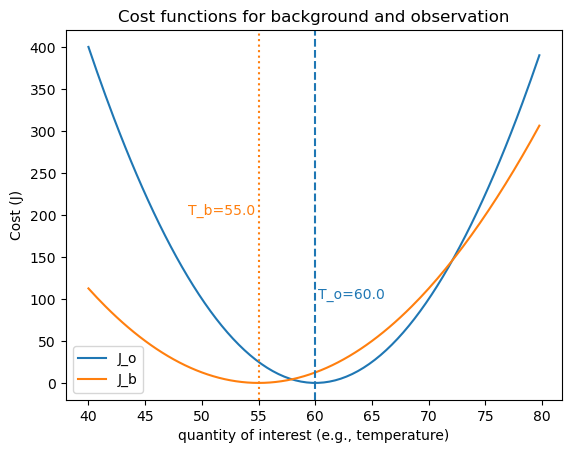

In [31]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

plt.plot(T, J_o, label='J_o', c=colors[0])
plt.plot(T, J_b, label='J_b', c=colors[1])
plt.axvline(T_o, linestyle='dashed', c=colors[0])
plt.axvline(T_b, linestyle='dotted', c=colors[1])

plt.annotate("T_o="+str(T_o), xy=(T_o, 1), xytext=(T_o+0.25, 100), c=colors[0])
plt.annotate("T_b="+str(T_b), xy=(T_b, 1), xytext=(T_b-6.25, 200), c=colors[1])

plt.legend()
plt.title("Cost functions for background and observation")
plt.xlabel("quantity of interest (e.g., temperature)")
plt.ylabel("Cost (J)")

### use scipy minimize function to find the minimum of the combined cost functions

In [32]:
J_min = minimize(J_func, T_b)   ### the value "x" is our analysis value

T_anl_cost = J_min.x[0]  ### analysis temperature

J_min


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.166666666666667
        x: [ 5.833e+01]
      nit: 2
      jac: [ 5.960e-08]
 hess_inv: [[ 6.667e-01]]
     nfev: 6
     njev: 3

### now add the combined J curve

Text(0, 0.5, 'Cost (J)')

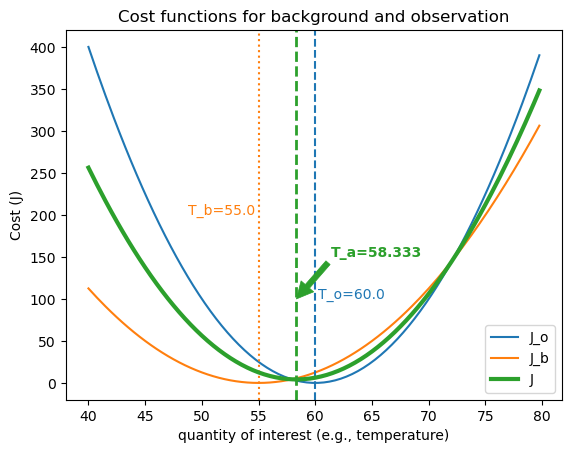

In [33]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

plt.plot(T, J_o, label='J_o', c=colors[0])
plt.plot(T, J_b, label='J_b', c=colors[1])
plt.axvline(T_o, linestyle='dashed', c=colors[0])
plt.axvline(T_b, linestyle='dotted', c=colors[1])

plt.plot(T, J_func(T), label='J', c=colors[2], lw=3)
plt.axvline(J_min.x[0], linestyle='dashed', c=colors[2], lw=2)

plt.annotate("T_o="+str(T_o), xy=(T_o, 1), xytext=(T_o+0.25, 100), c=colors[0])
plt.annotate("T_b="+str(T_b), xy=(T_b, 1), xytext=(T_b-6.25, 200), c=colors[1])
plt.annotate("T_a="+str(round(T_anl_cost,3)), xy=(T_anl_cost, 100), xytext=(T_anl_cost+3, 150), c=colors[2], fontweight='semibold',
            arrowprops=dict(color=colors[2], lw=0.5))

plt.legend()
plt.title("Cost functions for background and observation")
plt.xlabel("quantity of interest (e.g., temperature)")
plt.ylabel("Cost (J)")

In [34]:
print("analyzed T = "+str(T_anl_cost))

analyzed T = 58.33333336480773


### Note that the result is the same as in the previous method! 
#### But it gives a visual picture of what is happening.
#### This same math underlies much larger data assimilation tasks -- the implementation gets quite complicated, but still based on these principles

## Now, try changing the assumed variances, or the difference between the observation and the background, and see how things change!

...

## Also, think about how these ideas apply to developing data-driven prediction models...